## Step 1: Reading the data

In the [notebook](./Titanic.ipynb) provided, do the following:

1. Import `pandas` and `matplotlib.pyplot`
1. Load [train.csv](./train.csv) as a `pandas` DataFrame.
1. In each of the following sections, copy the question as a python comment, then answer the question with your own code.
1. Refer to the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data) if you need an explanation for any of the columns.

In [3]:
import pandas as pd 
import matplotlib as plt
import numpy as np
import fnmatch
import nbconvert
titanic= pd.read_csv('train.csv')
titanic.head()
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Step 2: Cleaning the data

1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

In [524]:
# 1)Create a bar chart showing how many missing values are in each column
# Bonus : Theres a good library for visualizing missing values called Missingno.
# Install Instructions
# Usage Documentation

<AxesSubplot:>

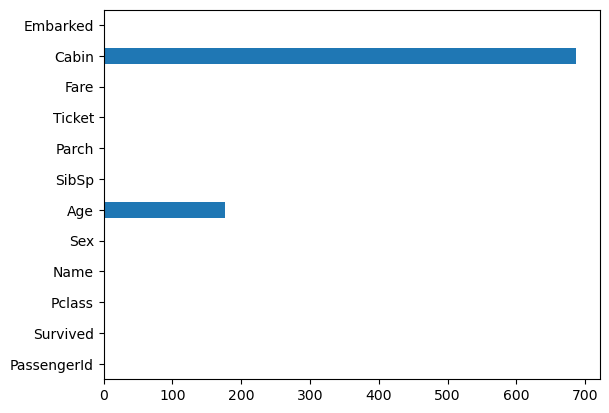

In [525]:
# 1)Create a bar chart showing how many missing values are in each column

titanic.isnull().sum().plot(kind='barh')

In [526]:
# 2)Which column has the most NaN values? How many cells in that column are empty?
# Answer: The Cabin column has the most NaN values.
# Answer: The total number of empty cells is 866
titanic.isnull().sum().sum()

866

In [527]:
# 3)Delete all rows where Embarked is empty
titanic=titanic.dropna(subset=['Embarked'])
titanic.shape




(889, 12)

In [528]:
# 4) Fill all empty cabins with **¯\\_(ツ)_/¯**
titanic['Cabin']= titanic['Cabin'].fillna('¯\\_(ツ)_/¯')
titanic['Cabin'].value_counts()


¯\_(ツ)_/¯      687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

In [529]:
## Step 3: Feature extraction
# 1.  There are two columns that pertain to how many family members are on 
# the boat for a given person. Create a new column called `FamilyCount`
# which will be the sum of those two columns.
# 2. Reverends have a special title in their name. Create a column 
# called `IsReverend`: 1 if they're a preacher, 0 if they're not.
# # 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
# #   - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
# #   - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
# #   - Do the same thing for `Sex`
# #   - BONUS: Extract the title from everyone's # 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
# name and create dummy columns


In [530]:
# # 1.  There are two columns that pertain to how many family members are
# on the boat for a given person. Create a new column called `FamilyCount` 
# which will be the sum of those two columns.

# def FamilyCount(row):
#    return row['SibSp']+row['Parch']
#titanic['FamilyCounts']=titanic.apply(FamilyCounts, axis=1)
titanic['FamilyCounts']=titanic['SibSp']+titanic['Parch']
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCounts'],
      dtype='object')

In [531]:
# 2. Reverends have a special title in their name. Create a column 
# called `IsReverend`: 1 if they're a preacher, 0 if they're not.
def IsReverend(row):
    if 'Rev.' in  row['Name']:
        return 1
    else:
        return 0
titanic['IsReverend']=titanic.apply(IsReverend, axis=1)
titanic['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [532]:
# # 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
# #   - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
# #   - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
# #   - Do the same thing for `Sex`
# #   - BONUS: Extract the title from everyone's # 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
# name and create dummy columns

In [533]:
titanic=pd.get_dummies(titanic,columns=['Embarked'])

In [534]:
titanic=pd.get_dummies(titanic,columns=['Sex'])

In [535]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCounts,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,0,0,0,0,1,0,1


In [536]:
# ## Step 4: Exploratory analysis 
# _[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

# 1. What was the survival rate overall?
# 2. Which gender fared the worst? What was their survival rate?
# 3. What was the survival rate for each `Pclass`?
# 4. Did any reverends survive? How many?
# 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
# 6. What is the survival rate for people whose `Age` is empty?
# 7. What is the survival rate for each port of embarkation?
# 8. What is the survival rate for children (under 12) in each `Pclass`?
# 9. Did the captain of the ship survive? Is he on the list?
# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?
# 11. Does having family on the boat help or hurt your chances of survival?

In [537]:
# 1. What was the survival rate overall?
sum(titanic['Survived']==1)/ titanic['Survived'].count()

0.38245219347581555

In [538]:
# 2. Which gender fared the worst? What was their survival rate?
# Male gender fared the worst more male deaths 
# Survival Rate of males 0.18890814558058924
train.groupby('Sex')['Survived'].value_counts()



Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [539]:
sum(train['Sex']=='male')

577

In [540]:
sum(titanic[titanic['Sex_male']==1]['Survived'])/sum(titanic['Sex_male'])

0.18890814558058924

In [541]:
# 3. What was the survival rate for each `Pclass`?
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [542]:
# 4. Did any reverends survive? How many?
# Answer: All 6 reverends have died 
titanic['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [543]:
sum(titanic[titanic['IsReverend']==1]['Survived']==1)

0

In [544]:
# 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**?
# Answer: Survival rate of cabin marked ¯\\_(ツ)_/¯  =  0.29985443959243085
sum(titanic[titanic['Cabin']=='¯\\_(ツ)_/¯']['Survived']==1)/sum(titanic['Cabin']=='¯\\_(ツ)_/¯')

0.29985443959243085

In [545]:
sum(titanic[titanic['Cabin']=='¯\\_(ツ)_/¯']['Survived'])/sum(titanic['Cabin']=='¯\\_(ツ)_/¯')

0.29985443959243085

In [546]:
titanic.groupby('Cabin')['Survived'].count()

Cabin
A10            1
A14            1
A16            1
A19            1
A20            1
            ... 
F38            1
F4             2
G6             4
T              1
¯\_(ツ)_/¯    687
Name: Survived, Length: 147, dtype: int64

In [547]:
sum(titanic['Cabin']=='¯\\_(ツ)_/¯')

687

In [548]:
# 6. What is the survival rate for people whose `Age` is empty?
# Answer; The survival rate of people whose age is empty is 0.2937853107344633
sum(titanic[titanic['Age'].isnull()]['Survived'])/sum(titanic['Age'].isnull())

0.2937853107344633

In [549]:
# 7. What is the survival rate for each port of embarkation?
# Answer: Survival Rate
# Embarked_C = 0.553571
# Embarked_Q = 0.38961038961038963
# Embarked_S = 0.33695652173913043
titanic.groupby('Embarked_C')['Survived'].mean()

Embarked_C
0    0.342580
1    0.553571
Name: Survived, dtype: float64

In [550]:
sum(titanic[titanic['Embarked_Q']==1]['Survived'])/sum(titanic['Embarked_Q'])

0.38961038961038963

In [551]:
sum(titanic['Embarked_Q'])

77

In [552]:
sum(titanic[titanic['Embarked_S']==1]['Survived'])/sum(titanic['Embarked_S'])

0.33695652173913043

In [553]:
sum(titanic['Embarked_S'])

644

In [554]:
# 8. What is the survival rate for children (under 12) in each `Pclass`?


In [555]:
titanic[titanic['Age']<12].groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [ ]:
# 9. Did the captain of the ship survive? Is he on the list?
# Answer: The Captin died and was on the list 

In [561]:
titanic[titanic['Name'].str.find('Capt')>0]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCounts,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,2,0,0,0,1,0,1


In [566]:
titanic[titanic['Name'].str.find('Capt')>0][['Name','Survived']]

,Name,Survived
745,"Crosby, Capt. Edward Gifford",0


In [ ]:
# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?
# Of all the people that die


In [584]:
titanic[titanic['Survived']==0][['Name','Fare']].max()

Name    van Melkebeke, Mr. Philemon
Fare                          263.0
dtype: object

In [583]:
titanic[titanic['Survived']==0].groupby('Name')['Fare'].max()

Name
Abbing, Mr. Anthony                 7.5500
Abbott, Mr. Rossmore Edward        20.2500
Abelson, Mr. Samuel                24.0000
Adahl, Mr. Mauritz Nils Martin      7.2500
Adams, Mr. John                     8.0500
                                    ...   
Zimmerman, Mr. Leo                  7.8750
de Pelsmaeker, Mr. Alfons           9.5000
del Carlo, Mr. Sebastiano          27.7208
van Billiard, Mr. Austin Blyler    14.5000
van Melkebeke, Mr. Philemon         9.5000
Name: Fare, Length: 549, dtype: float64